In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [3]:
sns.set_style("ticks")
sns.set_palette(sns.dark_palette("black"))

In [4]:
path = '../../output/20160508-crossvalidation-obs-vs-est'

In [5]:
df = pd.read_csv('{}/collection/results/crossvalidation_estimate_raw_ie.csv'.format(path), na_values=[-365, 365])

In [6]:
df.head()

,how,title,seq,GD,SF,BF,DTS,TP,CF,SM,...,EN.ef,EN.ef1,EN.d,EN.d1,EN.dr,EN.m,EN.r,EN.rf,EN.rf2,Obs
0,ESTIMATE,cherry_dc,0.0,100.791667,99.958333,98.875000,98.875000,99.0,98.916667,100.625000,...,99.829144,99.782488,99.901748,99.870660,100.298611,99.821690,99.817546,99.302998,100.336493,98.5
1,ESTIMATE,cherry_dc,1.0,107.583333,106.708333,106.708333,107.375000,108.0,109.333333,107.833333,...,107.137060,107.130093,107.165336,107.165683,107.142928,107.156435,107.163102,107.490000,106.976991,108.5
2,ESTIMATE,cherry_dc,2.0,111.125000,111.625000,112.625000,112.291667,113.0,113.375000,111.875000,...,110.741146,110.743495,110.747488,110.761887,110.514491,110.773287,110.783542,110.325995,110.684491,107.5
3,ESTIMATE,cherry_dc,3.0,103.916667,103.708333,103.833333,104.541667,103.0,101.500000,105.083333,...,104.687488,104.704086,104.669282,104.670475,104.815775,104.670613,104.668391,105.442998,104.640995,107.5
4,ESTIMATE,cherry_dc,4.0,109.833333,109.708333,108.666667,110.875000,113.0,108.583333,109.500000,...,111.037998,110.951319,110.958634,110.935197,110.738194,111.063241,111.064850,109.160000,109.727500,113.5


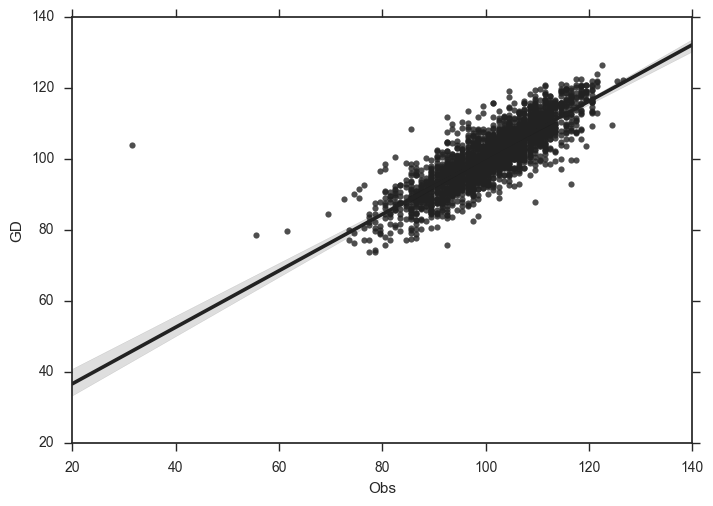

In [7]:
sns.regplot(x='Obs', y='GD', data=df)

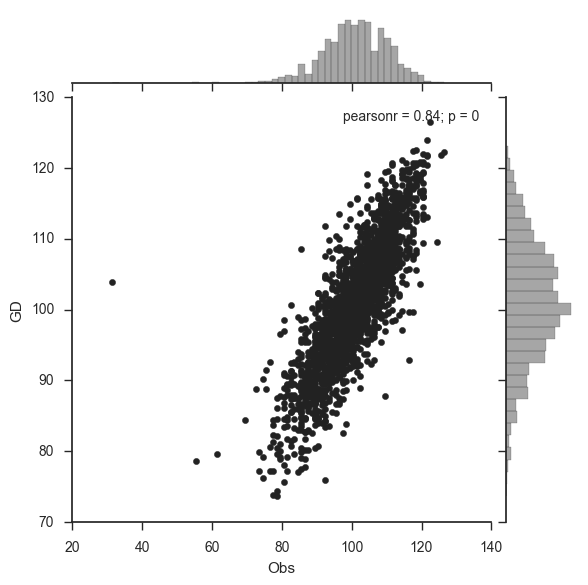

In [8]:
sns.jointplot(x='Obs', y='GD', data=df)

In [9]:
scipy.stats.pearsonr(df['Obs'], df['GD'])

(0.83928755771801233, 0.0)

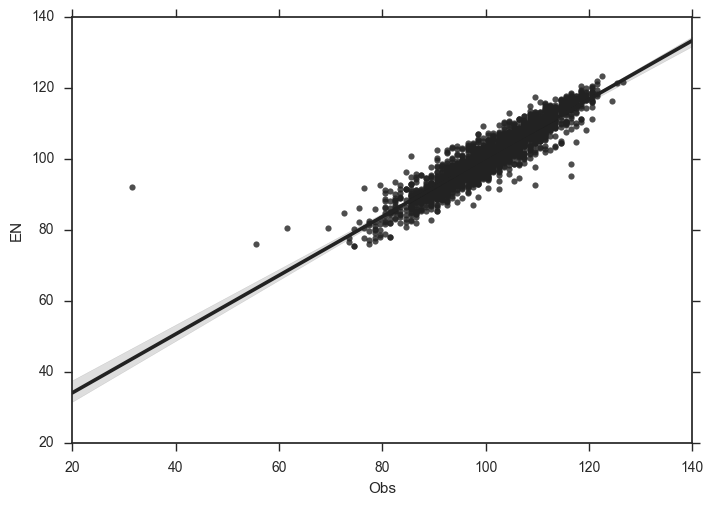

In [10]:
sns.regplot(x='Obs', y='EN', data=df)

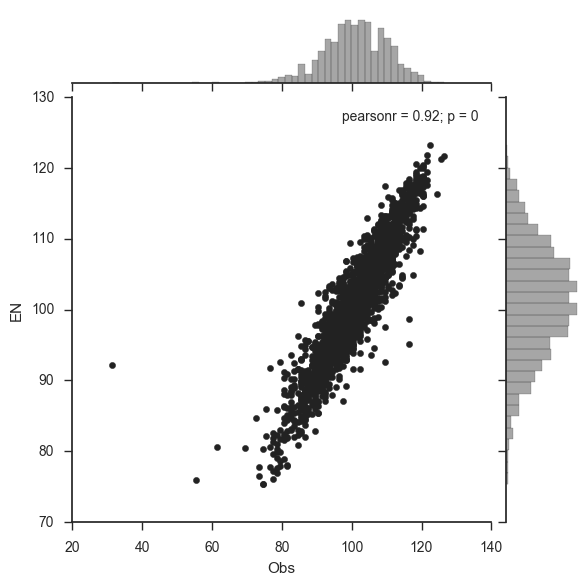

In [11]:
sns.jointplot(x='Obs', y='EN', data=df)

In [12]:
scipy.stats.pearsonr(df['Obs'], df['EN'])

(0.9233309414458114, 0.0)

[(50, 130), (50, 130)]

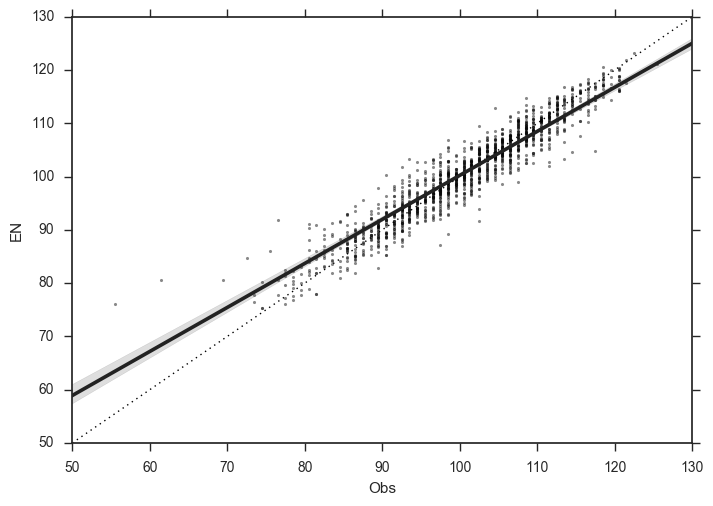

In [13]:
plt.plot([50, 130], [50, 130], 'k:', lw=1)
ax = sns.regplot(x='Obs', y='EN', color=sns.color_palette()[1], scatter_kws={'alpha': 0.5}, marker='.', fit_reg=False, data=df[df.title == 'pear_koera'])
ax = sns.regplot(x='Obs', y='EN', color=sns.color_palette()[2], scatter_kws={'alpha': 0.5}, marker='.', fit_reg=False, data=df[df.title == 'peach_korea'], ax=ax)
ax = sns.regplot(x='Obs', y='EN', color=sns.color_palette()[3], scatter_kws={'alpha': 0.5}, marker='.', fit_reg=False, data=df[df.title == 'apple_kearneysville'], ax=ax)
ax = sns.regplot(x='Obs', y='EN', color=sns.color_palette()[4], scatter_kws={'alpha': 0.5}, marker='.', fit_reg=False, data=df[df.title == 'cherry_korea'], ax=ax)
ax = sns.regplot(x='Obs', y='EN', color=sns.color_palette()[5], scatter_kws={'alpha': 0.5}, marker='.', fit_reg=False, data=df[df.title == 'cherry_dc'], ax=ax)
ax = sns.regplot(x='Obs', y='EN', color=sns.color_palette()[0], scatter=False, fit_reg=True, data=df, ax=ax)
ax.set(xlim=(50, 130), ylim=(50, 130))

In [14]:
def plot(df, model, r=(50, 140)):
    plt.plot(r, r, color=sns.xkcd_rgb['grey'], ls=':', lw=1)
    ax = sns.regplot(x=model, y='Obs', scatter_kws={'alpha': 0.5}, marker='o', data=df)
    ax.set(xlim=r, ylim=r)
    ax.set(xlabel='Predicted flowering date ({})'.format(model), ylabel='Observed flowering date')
    ax.set(aspect='equal')
    dfd = df.dropna()
    r2 = scipy.stats.pearsonr(dfd['Obs'], dfd[model])[0]**2
    rmse = np.sqrt(((dfd[model] - dfd['Obs'])**2).mean())
    ax.text(60, 60, '$r^2$ = {:.2f}\nRMSE = {:.2f}'.format(r2, rmse), fontsize=10)
    #plt.savefig('obs_vs_est_{}.png'.format(model), dpi=300)

In [15]:
df['M']

0       107.312500
1       107.312500
2       107.312500
3       107.312500
4       105.937500
5       105.937500
6       105.937500
7       105.937500
8       105.625000
9       105.625000
10      105.625000
11      105.625000
12      107.250000
13      107.250000
14      107.250000
15      107.250000
16      108.625000
17      108.625000
18      108.625000
19      108.625000
20       91.812500
21       91.812500
22       91.812500
23       91.812500
24       91.750000
25       91.750000
26       91.750000
27       91.750000
28       90.812500
29       90.812500
           ...    
2418    116.214282
2419    115.500000
2420    108.875000
2421    108.875000
2422    108.250000
2423    108.250000
2424    108.125000
2425    108.125000
2426    108.375000
2427    108.375000
2428    107.875000
2429    107.875000
2430    110.750000
2431    110.750000
2432    110.250000
2433    110.250000
2434    109.875000
2435    109.875000
2436    110.000000
2437    110.000000
2438    109.625000
2439    109.

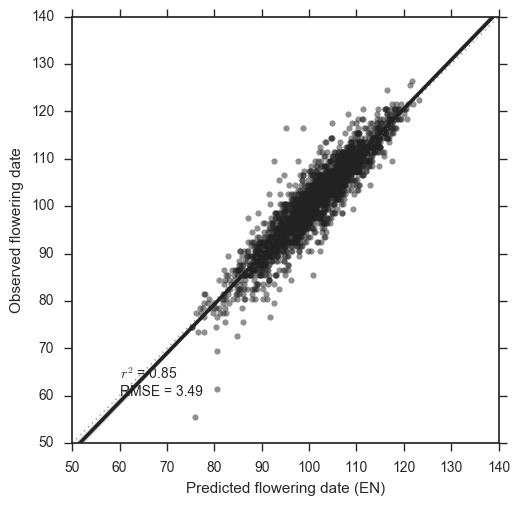

In [16]:
plot(df, 'EN')

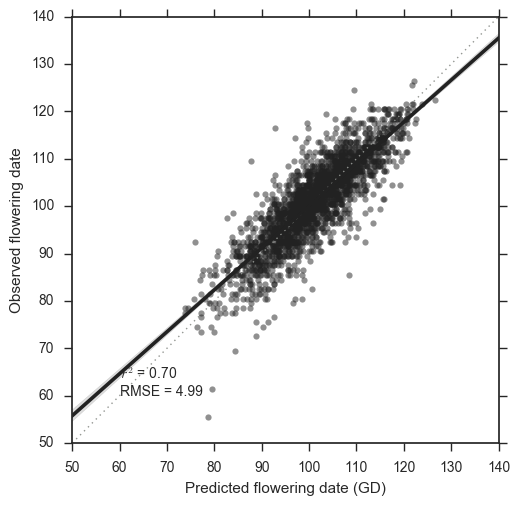

In [17]:
plot(df, 'GD')

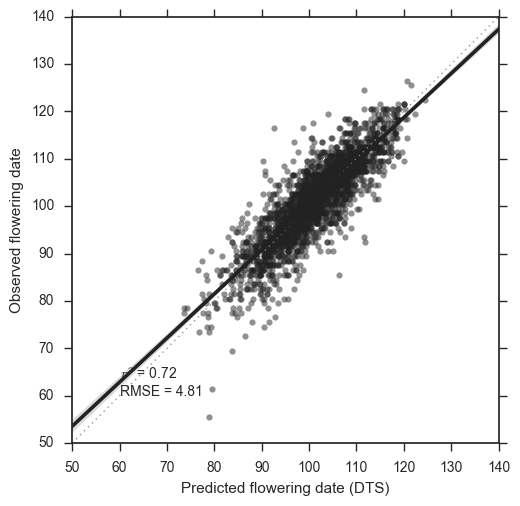

In [18]:
plot(df, 'DTS')

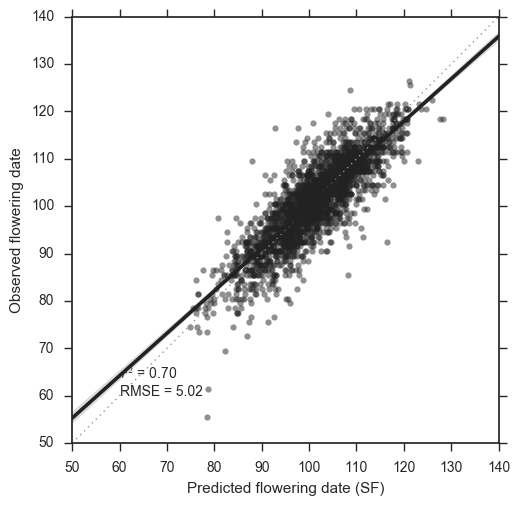

In [19]:
plot(df, 'SF')

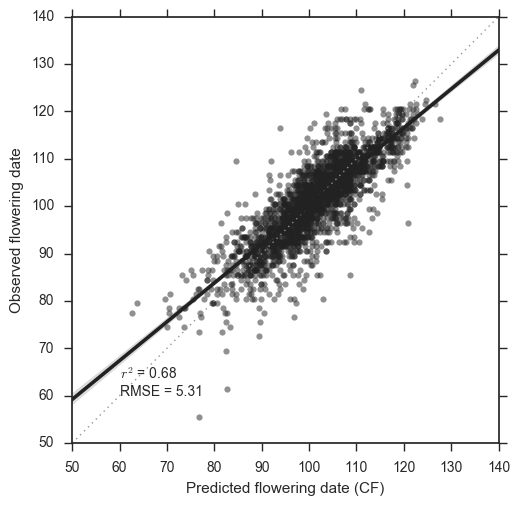

In [20]:
plot(df, 'CF')

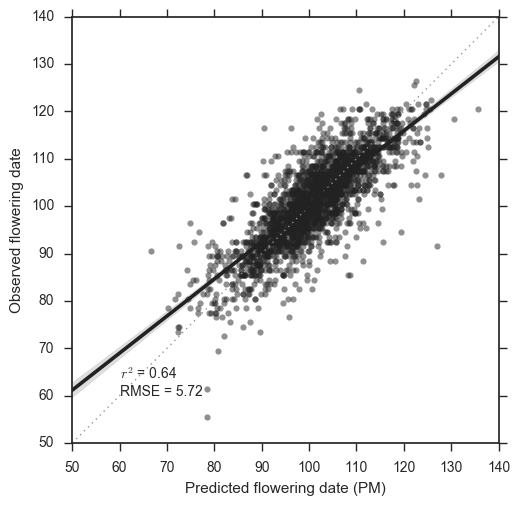

In [21]:
plot(df, 'PM')

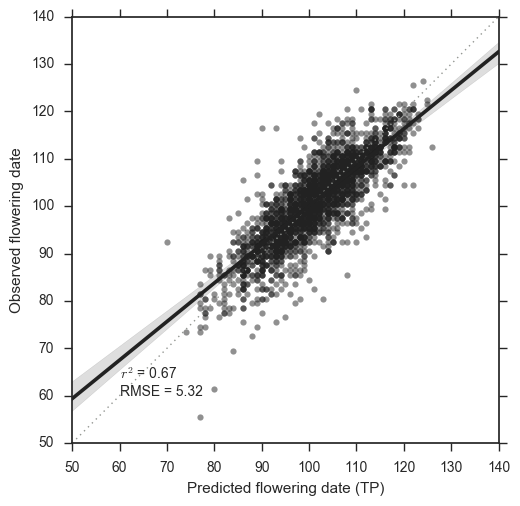

In [22]:
plot(df, 'TP')

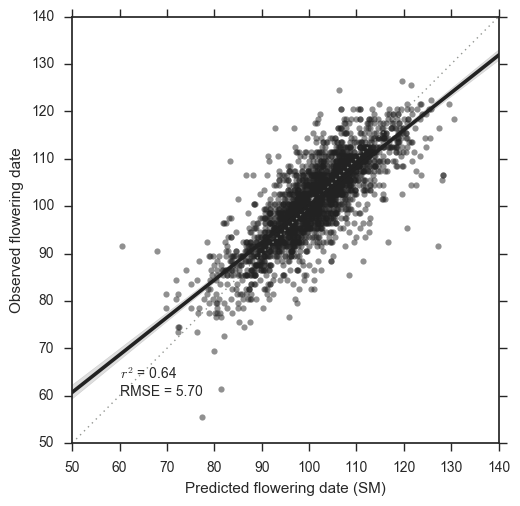

In [23]:
plot(df, 'SM')

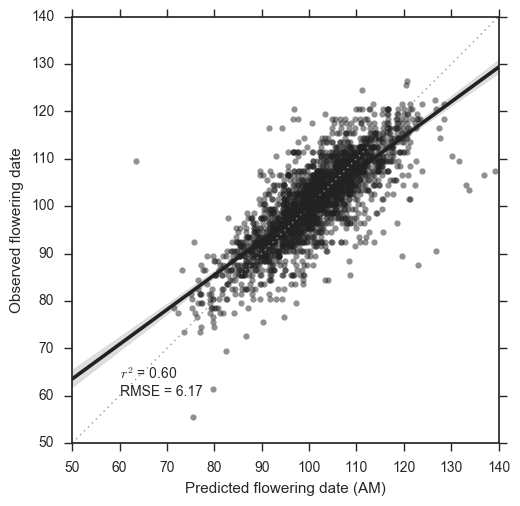

In [24]:
plot(df, 'AM')

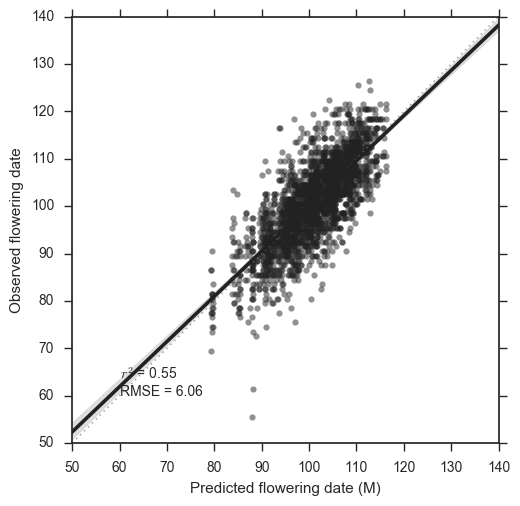

In [25]:
plot(df, 'M')

In [26]:
def plot_together(df, models, r=(50, 140), col_wrap=2):
    sdf = df[['Obs'] + models]
    mdf = pd.melt(sdf, id_vars=['Obs'], var_name='Model', value_name='Est')
    g = sns.lmplot(x='Est', y='Obs', col='Model', col_wrap=col_wrap, scatter_kws={'alpha': 0.5}, markers='o', data=mdf)
    g.set(xlim=r, ylim=r, aspect='equal')
    g.set_axis_labels('Predicted flowering date', 'Observed flowering date')
    dfd = sdf.dropna()
    for ax, m in zip(g.axes, g.col_names):
        ax.plot(r, r, color=sns.xkcd_rgb['grey'], ls=':', lw=1)
        r2 = scipy.stats.pearsonr(dfd['Obs'], dfd[m])[0]**2
        rmse = np.sqrt(((dfd[m] - dfd['Obs'])**2).mean())
        ax.text(70, 60, '$r^2$ = {:.2f}\nRMSE = {:.1f}'.format(r2, rmse), fontsize=10)
    plt.savefig('obs_vs_est_{}.png'.format('-'.join(models)), dpi=300)

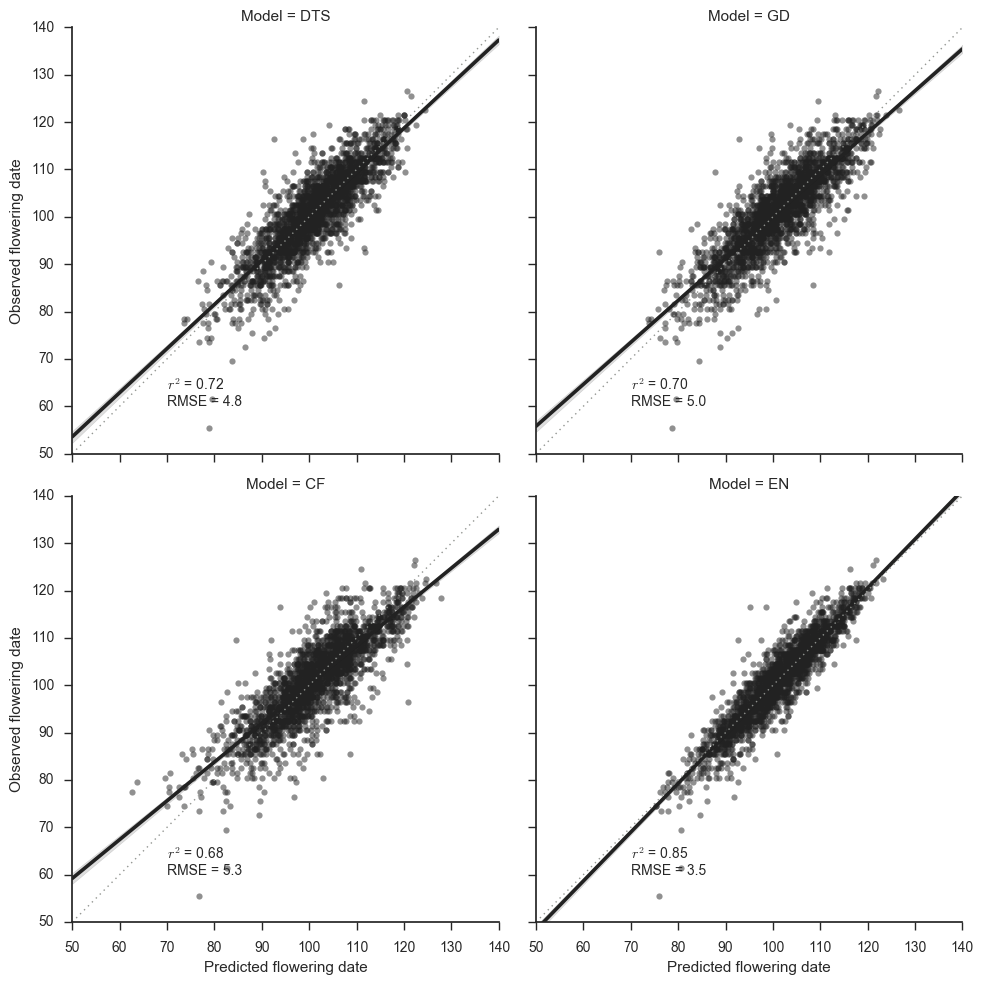

In [27]:
plot_together(df, ['DTS', 'GD', 'CF', 'EN'])

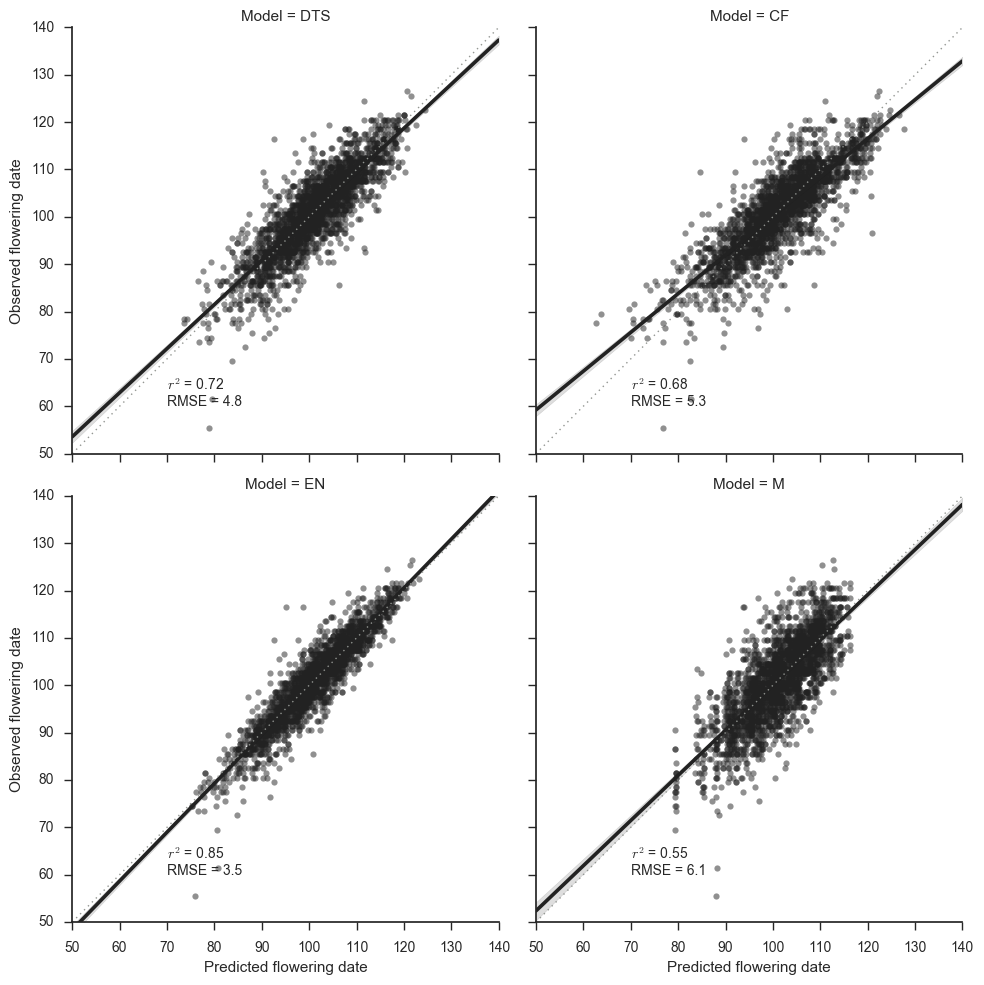

In [28]:
plot_together(df, ['DTS', 'CF', 'EN', 'M'])

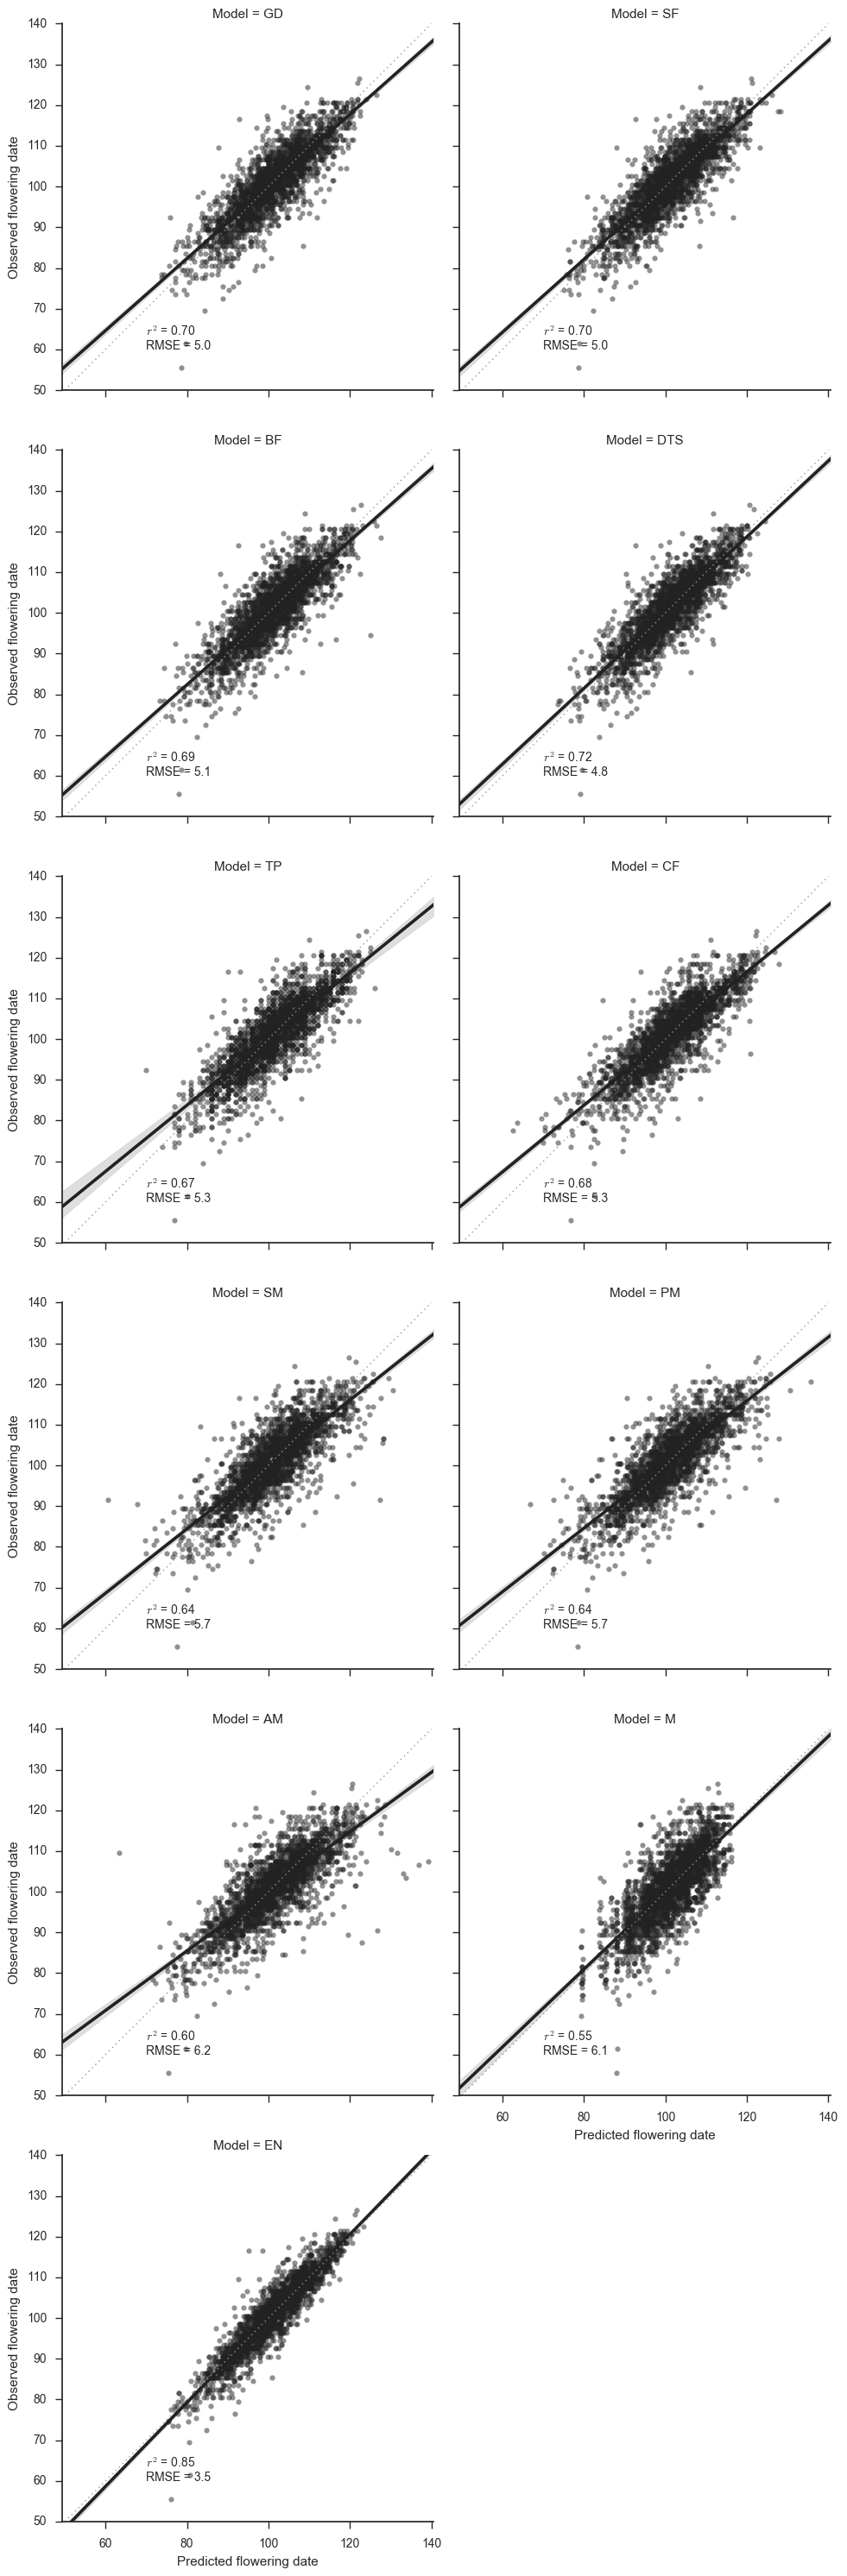

In [29]:
plot_together(df, ['GD', 'SF', 'BF', 'DTS', 'TP', 'CF', 'SM', 'PM', 'AM', 'M', 'EN'])